## This notebook is for applying the CNN model to the fashion MNIST data set.

Three basic components to define a basic convolutional neural network.

>The Convolutional Layer

>The Pooling layer

>The Output layer

### Click where you want to go!
<ul>
<li><a href="#preprocessing">Data Preprocessing</a></li>
<li><a href="#visualization">Data vizualization</a></li>
<li><a href="#cnn">CNN</a></li>
<li><a href="#results">Results</a></li>
</ul>

In [105]:
import numpy as np # linear algebra
import pandas as pd # data reading and preprocessing
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from sklearn.model_selection import train_test_split # to split the data to train and test sets
import matplotlib.pyplot as plt # to visualize the images
from keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')   # to avoid bad errors

<a id='preprocessing'></a>
### Data Preprocessing

In [106]:
# Now we read the train and test data files into a pandas dataframe.
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

In [107]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So, we have a column for labels and 784 column each for a pixel value for 1 image in every row. 

In [108]:
# To split the data we need to convert the dataframes into float numpy because keras accepts that.
train_dataf = np.array(train_data, dtype = 'float32')
test_dataf = np.array(test_data, dtype='float32')

In [109]:
# We also need to rescale the pixels to values between 0 and 1 for better results while splittinf them.
x_train = train_dataf[:,1:]/255
y_train = train_dataf[:,0]
x_test= test_dataf[:,1:]/255
y_test=test_dataf[:,0]

In [110]:
# now we create a validation set and actual training set
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

<a id='visualization'></a>
### Data Visualisation

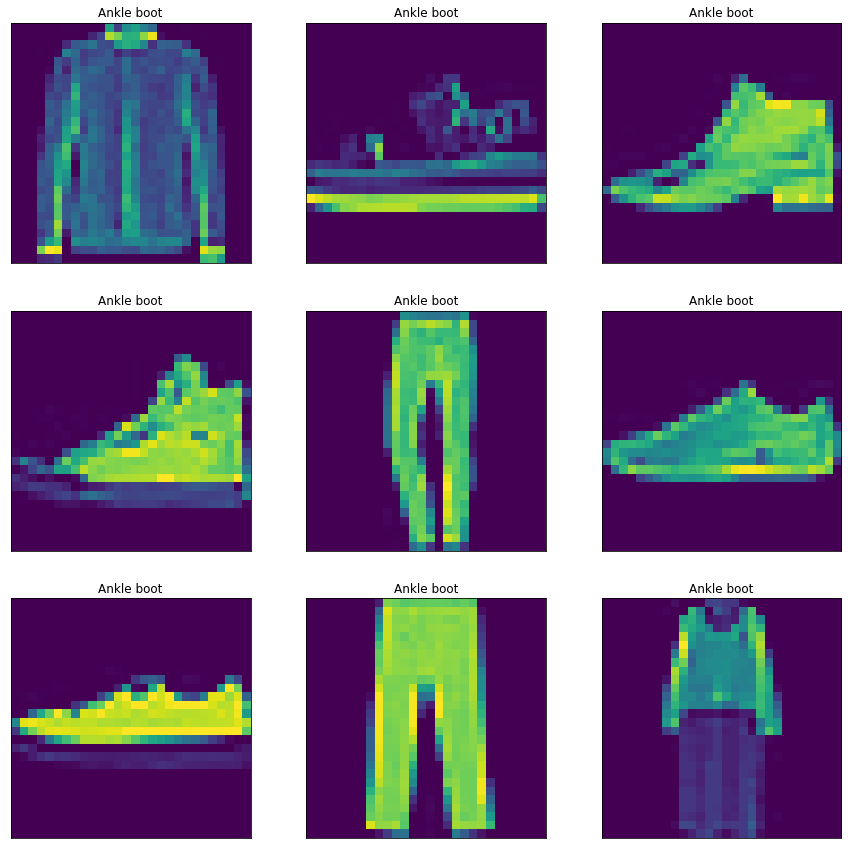

In [111]:
# now we try to visulaize our data which is ready now to train the network.
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # with the order that they are assigned to the labels
plt.figure(figsize=(15,15))
for i in range(9): # first 9 images 
    plt.subplot(3, 3, i + 1) # to put them all in one plot with 3 columns and 3 rows
    plt.xticks([])
    plt.yticks([]) # both lines to remove x and y axis numbers so the labels can appear correctly
    plt.imshow(x_train[i].reshape((28,28))) # to show the image  (28*28 = 784 (number of pixels))
    #label_index = int(y_train[i]) 
    plt.title(class_names[label_index]) # labels from y to show the classification of each image
plt.show()

<a id='cnn'></a>
### CNN

In [112]:
# Now we define the image shape and the batch size
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

In [113]:
# just a final touch on the train validate test split sets.
x_train = x_train.reshape(x_train.shape[0],*image_shape) # * to avoid integer error
x_test = x_test.reshape(x_test.shape[0],*image_shape) # and change only columns
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [114]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

The first layer in model network, keras.layers.Flatten, 
transforms the format of the images from 28*28 2d array to a 1d array (of 28 * 28 = 784 pixels). 

Now we need an optimizer , metrics and a loss function for the model to operate correctly.

In [115]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/75
12/12 [==============================] - 12s 978ms/step - loss: 1.8321 - accuracy: 0.4086 - val_loss: 1.2712 - val_accuracy: 0.6156
Epoch 2/75
12/12 [==============================] - 11s 913ms/step - loss: 1.0147 - accuracy: 0.6595 - val_loss: 0.7964 - val_accuracy: 0.7189
Epoch 3/75
12/12 [==============================] - 11s 915ms/step - loss: 0.7312 - accuracy: 0.7352 - val_loss: 0.6520 - val_accuracy: 0.7671
Epoch 4/75
12/12 [==============================] - 11s 906ms/step - loss: 0.6193 - accuracy: 0.7809 - val_loss: 0.5746 - val_accuracy: 0.7937
Epoch 5/75
12/12 [==============================] - 11s 932ms/step - loss: 0.5585 - accuracy: 0.8030 - val_loss: 0.5281 - val_accuracy: 0.8116
Epoch 6/75
12/12 [==============================] - 11s 947ms/step - loss: 0.5187 - accuracy: 0.8169 - val_loss: 0.4951 - val_accuracy: 0.8224
Epoch 7/75
12/12 [==============================] - 11s 939ms/step - loss: 0.4924 - accuracy: 0.8282 - val_loss: 0.4709 - val_accuracy: 0.8346

12/12 [==============================] - 11s 941ms/step - loss: 0.2702 - accuracy: 0.9044 - val_loss: 0.2837 - val_accuracy: 0.8998
Epoch 59/75
12/12 [==============================] - 11s 953ms/step - loss: 0.2671 - accuracy: 0.9057 - val_loss: 0.2825 - val_accuracy: 0.9000
Epoch 60/75
12/12 [==============================] - 11s 936ms/step - loss: 0.2679 - accuracy: 0.9038 - val_loss: 0.2826 - val_accuracy: 0.9007
Epoch 61/75
12/12 [==============================] - 11s 927ms/step - loss: 0.2683 - accuracy: 0.9040 - val_loss: 0.2838 - val_accuracy: 0.9003
Epoch 62/75
12/12 [==============================] - 11s 937ms/step - loss: 0.2647 - accuracy: 0.9053 - val_loss: 0.2812 - val_accuracy: 0.9013
Epoch 63/75
12/12 [==============================] - 11s 958ms/step - loss: 0.2618 - accuracy: 0.9071 - val_loss: 0.2790 - val_accuracy: 0.9024
Epoch 64/75
12/12 [==============================] - 11s 936ms/step - loss: 0.2607 - accuracy: 0.9075 - val_loss: 0.2806 - val_accuracy: 0.9005
Epoc

<a id='results'></a>
### Results!

In [116]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2630
Test Accuracy : 0.9071


#### We conclude that the accuracy was good but the loss could be improved a bit!